<h2>Solving the travelling salesman problem via recombination + mutation </h2>

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import random
import operator

In [2]:
info = pd.read_csv("ulysses16.csv", index_col=0, header=1)

labels = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P"]

cities = []
for x in range(16):
    cities.append(x+1)
    
dist = pd.DataFrame(None, index=cities,columns=cities)

def distance(a,b):
    return math.sqrt((info["x"][a]-info["x"][b])**2+(info["y"][a]-info["y"][b])**2)

for i in range(1,17):
    for j in range(1,17):
        dist[i][j] = distance(i,j)

data = dist.copy()

for x in range(1,17):
    data = data.rename(index ={x: str(labels[x-1])}, columns={x: str(labels[x-1])})
    
data

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
A,0.0,5.882329,5.421476,3.348194,10.966859,8.258045,7.312216,0.720278,11.708224,7.931066,25.720857,5.294998,5.070799,5.300509,6.691226,1.412091
B,5.882329,0.0,1.291898,4.487427,16.7559,14.10396,13.090611,6.066844,17.130619,13.197348,31.5536,11.074764,10.892952,11.171571,12.513804,6.593345
C,5.421476,1.291898,0.0,4.830114,16.388252,13.468367,12.396116,5.749435,16.233832,12.285154,30.856949,10.402125,10.257144,10.598349,12.11218,5.883672
D,3.348194,4.487427,4.830114,0.0,12.883509,11.007039,10.240396,2.961419,14.874855,11.203258,28.330572,8.290006,7.996562,8.04767,8.833623,4.720551
E,10.966859,16.7559,16.388252,12.883509,0.0,4.401011,5.568528,10.692596,7.882645,8.089264,15.963161,6.779985,6.704103,6.138224,4.28118,10.767302
F,8.258045,14.10396,13.468367,11.007039,4.401011,0.0,1.259365,8.250097,4.797604,3.711024,17.462829,3.077613,3.214607,2.980419,2.970152,7.586626
G,7.312216,13.090611,12.396116,10.240396,5.568528,1.259365,0.0,7.385046,4.89655,2.750654,18.468839,2.020619,2.256214,2.252044,3.170016,6.518136
H,0.720278,6.066844,5.749435,2.961419,10.692596,8.250097,7.385046,0.0,11.931458,8.242245,25.690389,5.394312,5.12884,5.270009,6.447891,2.039608
I,11.708224,17.130619,16.233832,14.874855,7.882645,4.797604,4.89655,11.931458,0.0,3.950456,15.208504,6.631629,6.967704,7.11922,7.758608,10.625841
J,7.931066,13.197348,12.285154,11.203258,8.089264,3.711024,2.750654,8.242245,3.950456,0.0,18.956152,3.408284,3.796103,4.229657,5.820249,6.756937


In [3]:
def produce_map(arr, title):
    new_info = info
    for x in range(1,17):
        new_info = new_info.rename(index ={x: str(labels[x-1])})

    new_info = new_info.reindex(arr)

    score = 0

    for x in range(len(arr)-1):
        a = arr[x]
        b = arr[x+1]
        score = score+ data[a][b]

    fig = plt.figure(figsize=[5,10])
    plt.title(title+". Distance "+str(round(score,2))+".")
    plt.xlim([33, 42])
    plt.plot(new_info["x"],new_info["y"])
    plt.scatter(info["x"],info["y"], facecolor="orange", marker='o', linewidths=0.01)
    for x in range(16):
        plt.annotate(labels[x], (info["x"].iloc[x], info["y"].iloc[x]))   

def reproduce(parent_1,parent_2):
    #Select starting and end point
    start = random.randint(0, 8)
    end = start+8
    #Select take section of parent 1
    order_1 = list.copy(parent_1.order[start:end])
    #Retreive all of parent 2
    order_2 = list.copy(parent_2.order[0:16])
    
    #Create a blank child
    child = [None for _ in range(16)]
    
    #Put the section from parent_1 into child
    for x in range(len(order_1)):
        #Remove used cities from parent 2 order
        order_2.remove(order_1[x])
        child[x+start] = order_1[x]
    #Create a lsit for the remainder of parent 2's order
    order_2_remainder = list.copy(order_2)
    
    if end != 16:
        for x in range(len(order_2)):
            #Add remaining order from parent 2 onto child, starting from where parent 1's section ended
            child[x+end] = order_2[x]
            order_2_remainder.remove(order_2[x])
            #If the end of the order is reached then stop
            if(x+end==15):
                break
        
    #The parent 2 order will continue from the start of the child        
    if len(order_2_remainder)!=0:
        for x in range(len(order_2_remainder)):
            child[x] = order_2_remainder[x]
    
    child.append(child[0])
    
    return child

In [4]:
class Organism:

    def __init__(self):
        self.order = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P"]
        random.shuffle(self.order)
        self.order.append(self.order[0])
        self.update_score()
    
    def update_score(self):
        total = 0
    
        for x in range(len(self.order)-1):
            a = self.order[x]
            b = self.order[x+1]
            total = total+ data[a][b]
        self.score = total
        
    def update_order(self, new_order):
        self.order = new_order
    
    def mutate(self):
        a = random.randint(0, 15)
        b = random.randint(0, 15)
        while b==a:
            b = random.randint(0, 15)
        rand1 = self.order[a]
        rand2 = self.order[b]
        self.order[a] = rand2
        self.order[b] = rand1
        
        self.order[16] = self.order[0]
        self.update_score()

In [5]:
def evolution():
    population = []
    parents = []
    size = 100
    mutation_chance = 0.7
    generations = 100
    n_children = 2
    
    #Initlise the organisms
    for x in range(size):
        population.append(Organism())
    
    #Loop for each generation
    for x in range(generations):      
        
        #Sort the population in order of best solutions
        population.sort(key=operator.attrgetter('score'))
        #Select the best half population
        half = int(len(population)/2)
        quarter = int(len(population)/4)
        population = population[0:half]
        
        #loop through the remaining population
        for x in range(quarter):
            y = x*2
            #Create children by matching the best parents with each other
            for i in range(n_children):
                order = reproduce(population[y],population[y+1])
                new = Organism()
                new.update_order(order)
                #Mutate if there is a chance
                if(random.uniform(0, 1)<mutation_chance):
                    new.mutate()
                population.append(new)
                
    population.sort(key=operator.attrgetter('score'))
    produce_map(population[0].order, str(x))

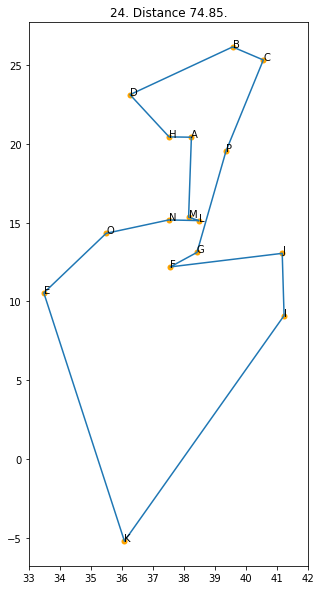

In [8]:
evolution()